In [ ]:
import pandas as pd

# Load the Excel file
file_path = 'intel.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Product name,Review Title,Review Text,Rating
0,Intel Core i7-12700K Desktop Processor 12 (8P+...,A superb piece of a processor,"No doubt, 12th gen Intel processors are a marv...",5.0
1,Intel Core i7-12700K Desktop Processor 12 (8P+...,Beast processor with Intel UHD shared Graphics,Overall good processor for the price and more ...,5.0
2,Intel Core i7-12700K Desktop Processor 12 (8P+...,Great,"Excellent processor, mounted on the PC perfect...",5.0
3,Intel Core i7-12700K Desktop Processor 12 (8P+...,Fast processor,"Does exactly what it's supposed to do, my comp...",5.0
4,Intel Core i7-12700K Desktop Processor 12 (8P+...,It's Intel!,"Working well, stable and can be overclock - wi...",5.0


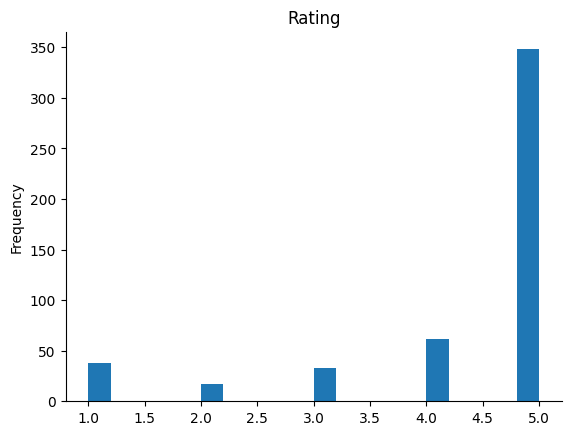

In [ ]:
# @title Rating

from matplotlib import pyplot as plt
data['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.tail()

,Product name,Review Title,Review Text,Rating
494,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,Great,I got useless product but thankfully to Amazon...,5.0
495,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,Amazing GPU from Intel,The GPU itself has improved since the release....,5.0
496,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,Cheap- yes. Fast- not really. Frame rate issue...,it doesn't support DLSS which is a standard w...,3.0
497,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,nice product,fast and cheap,4.0
498,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,Better than expected,"Overall, extremely pleased with the results, w...",5.0


<ipython-input-4-b50a11a34bd5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=data, palette='viridis')


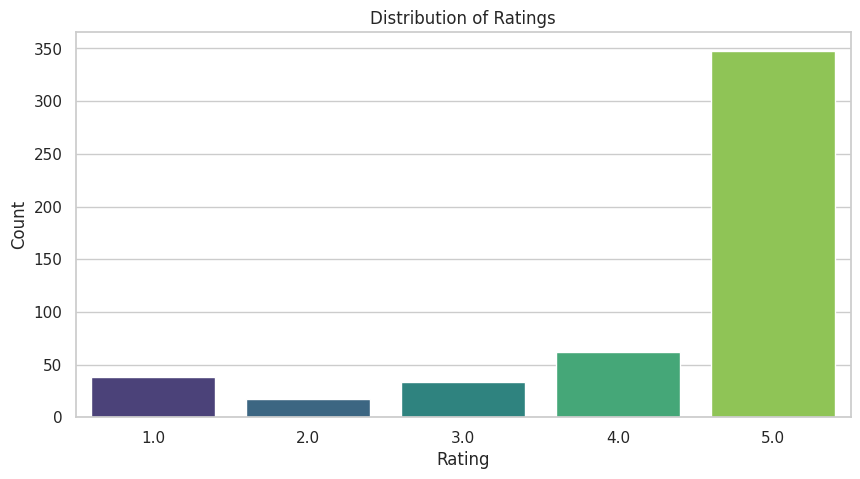

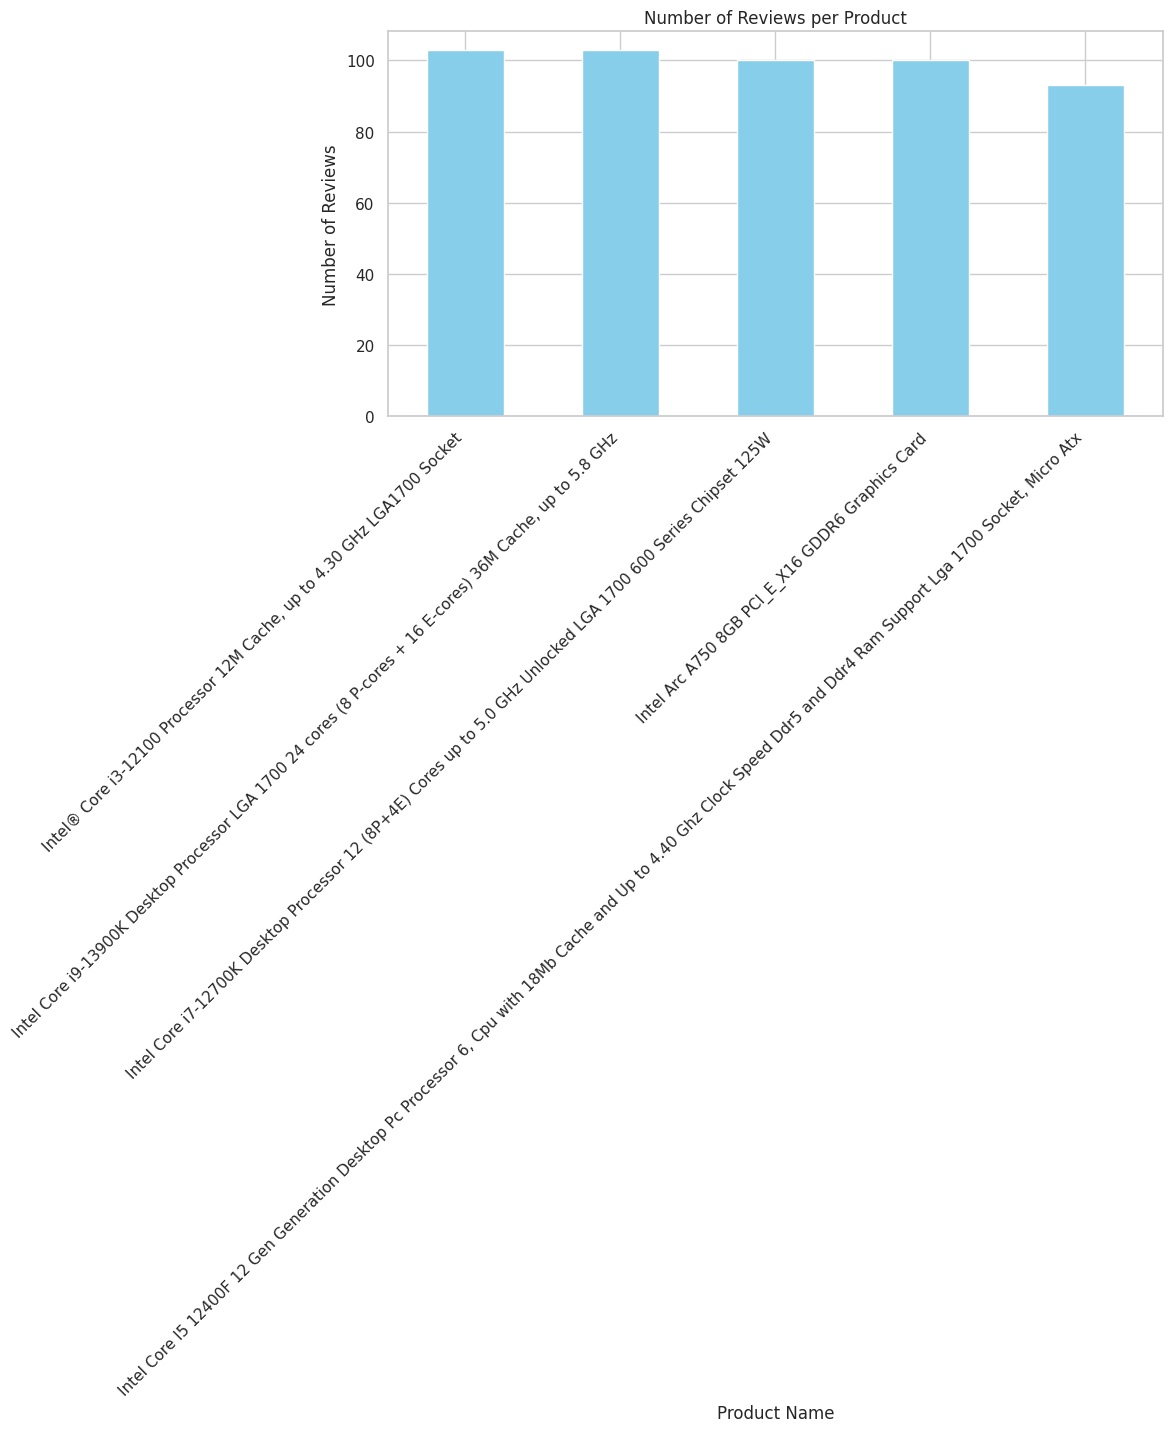

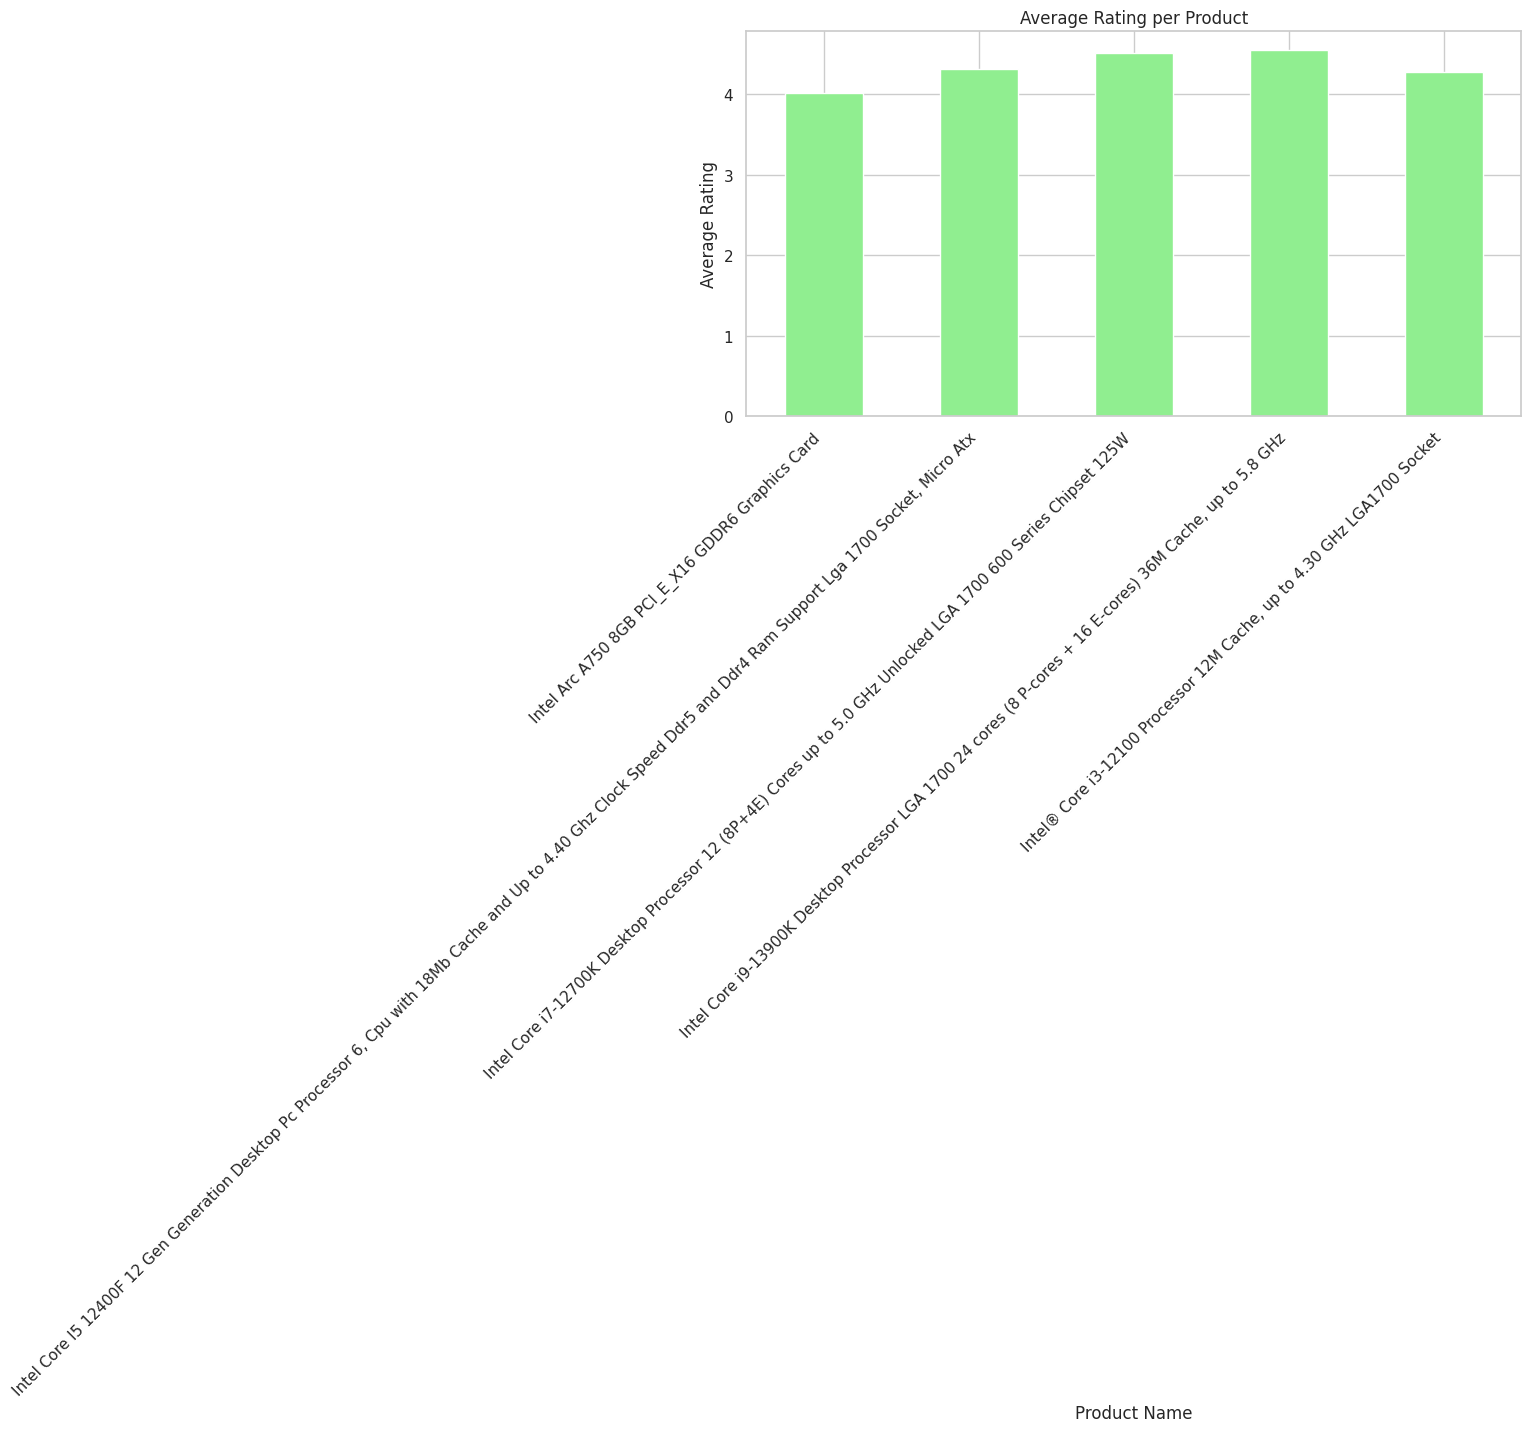

(Rating
 1.0     38
 2.0     17
 3.0     33
 4.0     62
 5.0    348
 Name: count, dtype: int64,
 Product name
 Intel® Core i3-12100 Processor 12M Cache, up to 4.30 GHz LGA1700 Socket                                                                                                   103
 Intel Core i9-13900K Desktop Processor LGA 1700 24 cores (8 P-cores + 16 E-cores) 36M Cache, up to 5.8 GHz                                                                103
 Intel Core i7-12700K Desktop Processor 12 (8P+4E) Cores up to 5.0 GHz Unlocked LGA 1700 600 Series Chipset 125W                                                           100
 Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card                                                                                                                          100
 Intel Core I5 12400F 12 Gen Generation Desktop Pc Processor 6, Cpu with 18Mb Cache and Up to 4.40 Ghz Clock Speed Ddr5 and Ddr4 Ram Support Lga 1700 Socket, Micro Atx     93
 Name: count, d

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style='whitegrid')

# Basic statistics
rating_distribution = data['Rating'].value_counts().sort_index()
reviews_per_product = data['Product name'].value_counts()
average_rating_per_product = data.groupby('Product name')['Rating'].mean()

# Plot distribution of ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot number of reviews per product
plt.figure(figsize=(10, 5))
reviews_per_product.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot average rating per product
plt.figure(figsize=(10, 5))
average_rating_per_product.plot(kind='bar', color='lightgreen')
plt.title('Average Rating per Product')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

rating_distribution, reviews_per_product, average_rating_per_product


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()


In [ ]:
data['Sentiment Score'] = data['Review Text'].apply(lambda x: sid.polarity_scores(x)['compound'])


In [ ]:
data['Sentiment'] = data['Sentiment Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


<ipython-input-11-0026c985cfd1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


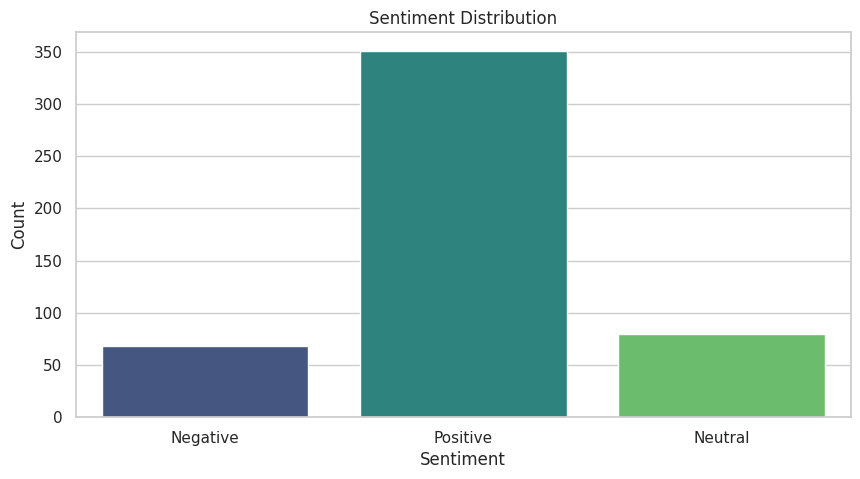

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


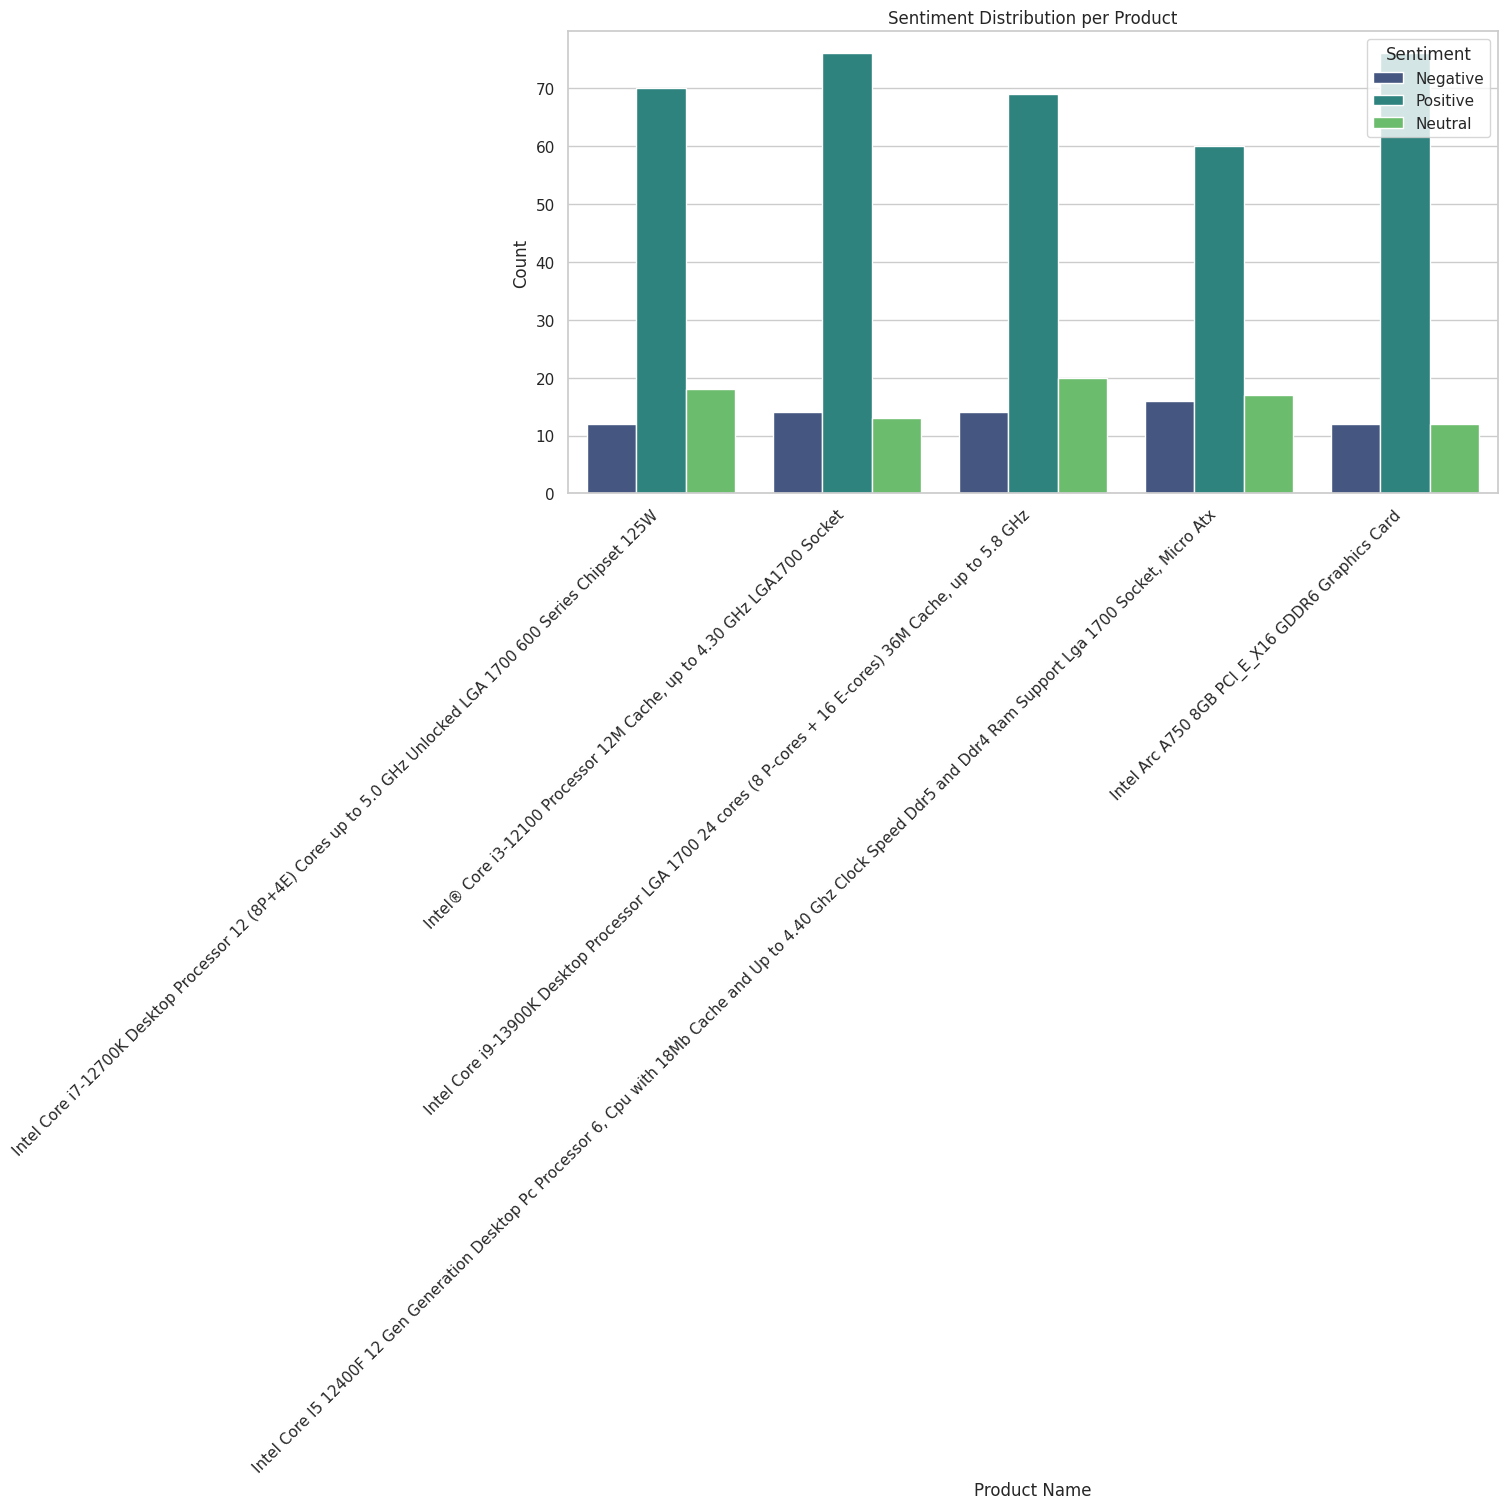

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product name', hue='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


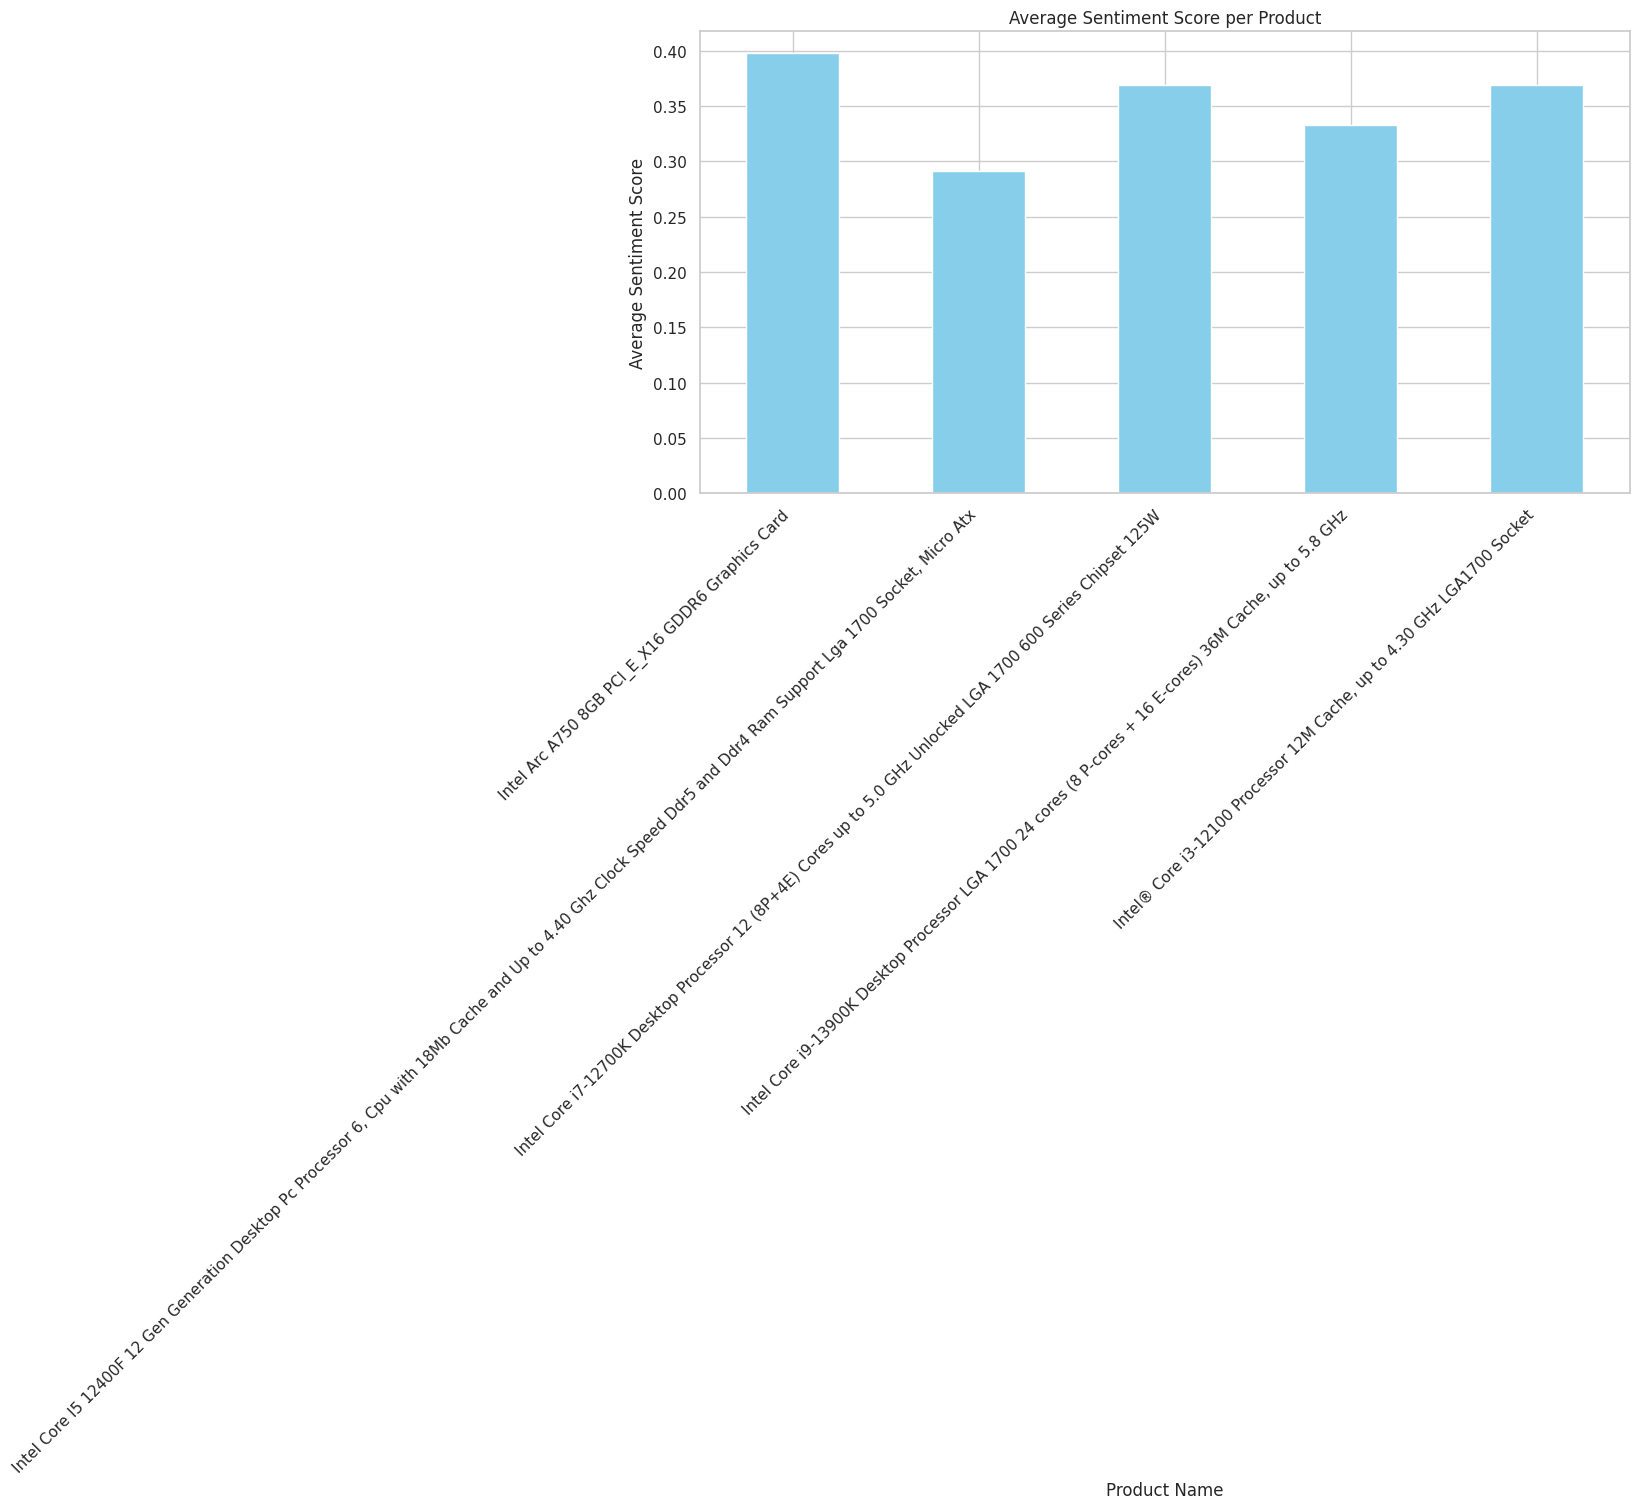

In [ ]:
average_sentiment_per_product = data.groupby('Product name')['Sentiment Score'].mean()

plt.figure(figsize=(12, 6))
average_sentiment_per_product.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score per Product')
plt.xlabel('Product Name')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Load the Excel file
file_path = 'intel.xlsx'  # Change this to the path of your file
data = pd.read_excel(file_path)

# Initialize the Sentiment Analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Calculate Sentiment Scores
data['Sentiment Score'] = data['Review Text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify Sentiment
data['Sentiment'] = data['Sentiment Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Filter Negative Reviews
negative_reviews = data[data['Sentiment'] == 'Negative']

# Save negative reviews to a new Excel file
negative_reviews.to_excel('negative_reviews.xlsx', index=False)

# Display the negative reviews
negative_reviews.tail()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Product name,Review Title,Review Text,Rating,Sentiment Score,Sentiment
475,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,"Awful driver issues, high CPU usage, tried lot...",The drivers for these cards are not mature.,1.0,-0.3252,Negative
478,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,"Not user friendly, but good value","It’s a good card for the money, but you should...",5.0,-0.1406,Negative
490,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,Do not buy from this seller,They didn't fully refund! I bought but it's no...,1.0,-0.4903,Negative
493,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,DO NOT BUY. Muliti monitors DO NOT WORK,As an intel fan I'm super disappointed with th...,1.0,-0.1027,Negative
496,Intel Arc A750 8GB PCI_E_X16 GDDR6 Graphics Card,Cheap- yes. Fast- not really. Frame rate issue...,it doesn't support DLSS which is a standard w...,3.0,-0.1230,Negative


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Load the Excel file
file_path = 'intel.xlsx'  # Change this to the path of your file
data = pd.read_excel(file_path)

# Initialize the Sentiment Analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Calculate Sentiment Scores
data['Sentiment Score'] = data['Review Text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify Sentiment
data['Sentiment'] = data['Sentiment Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Filter Positive Reviews
positive_reviews = data[data['Sentiment'] == 'Positive']

# Save positive reviews to a new Excel file
positive_reviews.to_excel('positive_reviews.xlsx', index=False)

# Display the positive reviews
positive_reviews.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Product name,Review Title,Review Text,Rating,Sentiment Score,Sentiment
1,Intel Core i7-12700K Desktop Processor 12 (8P+...,Beast processor with Intel UHD shared Graphics,Overall good processor for the price and more ...,5.0,0.4404,Positive
2,Intel Core i7-12700K Desktop Processor 12 (8P+...,Great,"Excellent processor, mounted on the PC perfect...",5.0,0.8832,Positive
3,Intel Core i7-12700K Desktop Processor 12 (8P+...,Fast processor,"Does exactly what it's supposed to do, my comp...",5.0,0.6249,Positive
4,Intel Core i7-12700K Desktop Processor 12 (8P+...,It's Intel!,"Working well, stable and can be overclock - wi...",5.0,0.7351,Positive
5,Intel Core i7-12700K Desktop Processor 12 (8P+...,Fantastic Buy,Good value purchase to build a system.,5.0,0.6486,Positive
